# Naive Bayes

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

# Dataset

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Renaming the Columns

In [3]:
df.columns
col_names = ["ID", "dependents", "education", "self-employed", "income_annum", "loan_amount", 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

df.columns = col_names
df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Label Encoder

In [4]:
categorical_data = ["education", "self-employed", "loan_status"]
label_encoder = LabelEncoder()
for i in categorical_data:
  df[i] = label_encoder.fit_transform(df[i])

df.head()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [5]:
#describe

df.describe()

,ID,dependents,education,self-employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.377840
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


# Feature Selection

In [6]:
# split the data

clean_data = df.drop(['ID'], axis=1)


#split the data into independent and depedent variables

X = clean_data.iloc[:, :-1].values #indepedent variable
y = clean_data.iloc[:, -1].values #dependent variable

# Split Test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the model

In [8]:
naives_bayes_model = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

#Train the data
naives_bayes_model.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

# Predictions

In [9]:
naive_predict = naives_bayes_model.predict(X_test)
decision_tree_predict = decision_tree_classifier.predict(X_test)
random_forest_predict = random_forest_model.predict(X_test)


# Table

In [10]:
table = pd.DataFrame({"Actual": y_test, "Prediction": naive_predict})
table

,Actual,Prediction
0,1,0
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
849,0,0
850,0,0
851,0,0
852,0,0


# Model Evaluation

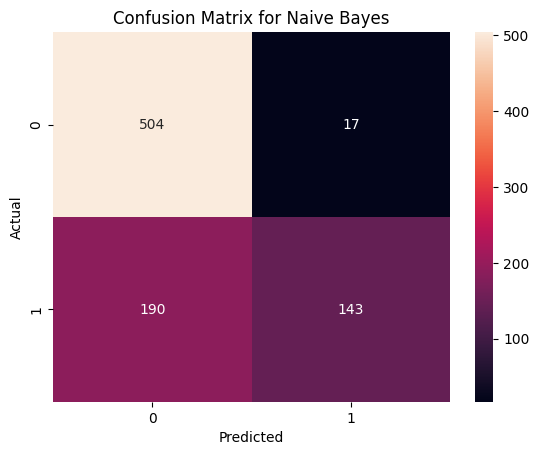

In [11]:
cm = confusion_matrix(y_test, naive_predict)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Classification Report

report = classification_report(y_test, naive_predict)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       521
           1       0.89      0.43      0.58       333

    accuracy                           0.76       854
   macro avg       0.81      0.70      0.70       854
weighted avg       0.79      0.76      0.73       854



# AUC-ROC

In [13]:
y_pred_probab = naives_bayes_model.predict_proba(X_test)

fpr, tpr, tresholds = roc_curve(y_test, y_pred_probab[:, 1])

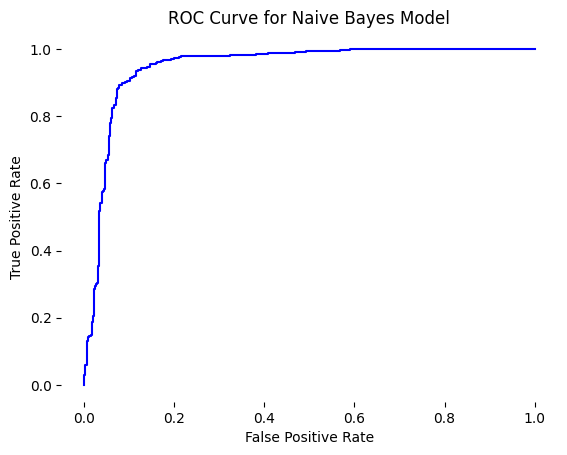

In [14]:
plt.plot(fpr, tpr, label="Naive Bayes Model", color = "blue")
plt.title("ROC Curve for Naive Bayes Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.box(False)
plt.show()

In [15]:
auc_score = roc_auc_score(y_test, y_pred_probab[:,1])
print(auc_score *100)

94.67413670868565


In [16]:
accuracy = accuracy_score(y_test, naive_predict)
print(accuracy * 100)

75.76112412177986
